Clustering


In [1]:
import numpy as np
X = np.random.randn(50,2) 
X[0:25, 0] = X[0:25, 0] + 3 
X[0:25, 1] = X[0:25, 1] - 4

Text(0, 0.5, 'X2 ')

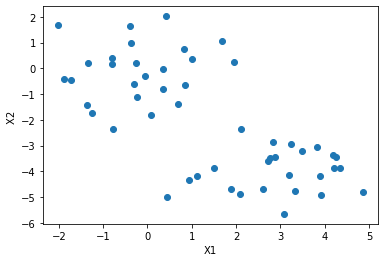

In [2]:
import matplotlib . pyplot as plt 
plt.plot(X[:,0], X[:,1],"o")
plt.xlabel( "X1" )
plt.ylabel("X2 ")

In [3]:
from sklearn . cluster import KMeans
kmeans = KMeans(n_clusters = 2, random_state = 100).fit(X)

In [4]:
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [5]:
print(kmeans.cluster_centers_)

[[-0.21428436 -0.13367072]
 [ 2.94690123 -3.98386068]]


Text(0, 0.5, 'X2')

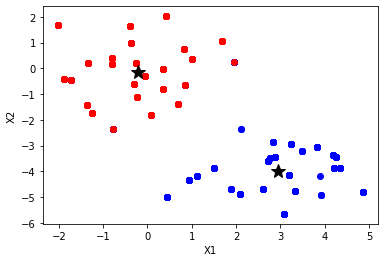

In [6]:
for i in range(0,X.shape[0]): 
    if kmeans.labels_ [i] == 0:
        plt.plot(X[i:,0], X[i:,1],"o",color= "red") 
    else :
        plt.plot(X[i:,0], X[i:,1],"o",color= "blue")

centroid1=kmeans.cluster_centers_[0]
centroid2=kmeans.cluster_centers_[1] 
plt.plot(centroid1[0],centroid1[1],"*",color= "black",markersize = 15) 
plt.plot(centroid2[0],centroid2[1],"*",color= "black",markersize = 15)
plt.xlabel("X1" )
plt.ylabel ("X2" )

1. [graded question] Now, you are going to perform K−means with real data. The file Live 20210128.csv contains statistics about Facebook pages of 10 Thai fashion and cosmetics retail sellers. Each observation represents a post of different nature (video, photo, status or link). The features
are variables describing each post such as the date, the number of reactions (num reactions), number of comments (num comments), number of likes (num likes), etc. Import the data set
and get familiar with the data. After dropping the last 4 columns (empty)which, answer the following questions : how many observations are there ? How many variables are there ? You will denote the resulting dataframe object Live.

1. CODE FOR ANSWER = 

In [14]:
import pandas as pd
live = pd.read_csv("Live 20210128.csv")

In [16]:
live.describe()

,status_id,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,0.0,0.0,0.0,0.0
mean,3525.500000,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191,NaN,NaN,NaN,NaN
std,2035.304031,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812,NaN,NaN,NaN,NaN
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,1763.250000,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
50%,3525.500000,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
75%,5287.750000,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
max,7050.000000,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000,NaN,NaN,NaN,NaN


In [17]:
live = live.drop( ['Column1', 'Column2', 'Column3' , "Column4"], axis=1)

In [18]:
live.describe()

,status_id,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,3525.500000,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191
std,2035.304031,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1763.250000,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3525.500000,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5287.750000,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000
max,7050.000000,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000


1. ---ANSWER--- =   
 how many observations are there ?
 7050

  How many variables are there ?
  10

In [8]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler ()

In [9]:
from sklearn.cluster import KMeans
Live_Kmeans4=KMeans(n_clusters = 4, n_init = 50, random_state =1000).fit(Live_scaled)
Live_Kmeans4_labels=Live_Kmeans4.labels_
Live_Kmeans4_labels_

NameError: name 'Live_scaled' is not defined

In [ ]:
import pandas as pd
pd.crosstab(index = Live.status_type ,
columns = Live_Kmeans4_labels ,
rownames = ["Real groups"], 
colnames = ["K−means clusters"])

In [ ]:
distortions = [] K = range(1,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k, n_init = 50, random_state =
    1000) 
    kmeanModel.fit(Live_scaled)
    distortions.append(kmeanModel.inertia_)
